In [15]:
import os

os.makedirs("/content/ds_prathmesh_shinde/csv_files", exist_ok=True)
os.makedirs("/content/ds_prathmesh_shinde/outputs", exist_ok=True)



In [16]:
!pip install -q gdown
import gdown

gdown.download("https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs",
               "/content/ds_prathmesh_shinde/csv_files/trader_data.csv",
               quiet=False)

gdown.download("https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf",
               "/content/ds_prathmesh_shinde/csv_files/fear_greed.csv",
               quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: /content/ds_prathmesh_shinde/csv_files/trader_data.csv
100%|██████████| 47.5M/47.5M [00:00<00:00, 159MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: /content/ds_prathmesh_shinde/csv_files/fear_greed.csv
100%|██████████| 90.8k/90.8k [00:00<00:00, 33.5MB/s]


'/content/ds_prathmesh_shinde/csv_files/fear_greed.csv'

In [17]:
import pandas as pd

trades = pd.read_csv("/content/ds_prathmesh_shinde/csv_files/trader_data.csv")
sentiment = pd.read_csv("/content/ds_prathmesh_shinde/csv_files/fear_greed.csv")

print(trades.shape, sentiment.shape)


(211224, 16) (2644, 4)


In [18]:
print("Sentiment columns:", sentiment.columns)

Sentiment columns: Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [19]:
print(trades.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [20]:
# Convert trade timestamp
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], errors='coerce')
trades = trades.dropna(subset=['Timestamp IST'])
trades['date'] = trades['Timestamp IST'].dt.date

# Convert sentiment date
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce').dt.date

# Standardize sentiment labels
sentiment['classification'] = sentiment['classification'].str.lower()


In [21]:
merged = trades.merge(
    sentiment[['date','classification']],
    on='date',
    how='inner'
)

print("Merged trades:", len(merged))
display(merged.head())


Merged trades: 35864


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,greed


In [22]:
merged['profit'] = merged['Closed PnL']
merged['volume'] = merged['Size USD']
merged['win'] = merged['profit'] > 0


In [23]:
summary = merged.groupby('classification').agg({
    'profit': ['mean','sum'],
    'volume': 'mean',
    'win': 'mean'
})

summary


profit                     volume       win
                      mean           sum         mean      mean
classification                                                 
extreme fear      1.891632  4.399937e+03  4118.761840  0.292777
extreme greed   205.816345  1.156894e+06  3242.085086  0.553282
fear            128.287950  1.779226e+06  5744.782685  0.381787
greed            53.988003  6.096325e+05  5051.878829  0.435707
neutral          27.088803  7.465674e+04  4332.202906  0.494920

In [24]:
!zip -r project_backup.zip /content/ds_prathmesh_shinde


  adding: content/ds_prathmesh_shinde/ (stored 0%)
  adding: content/ds_prathmesh_shinde/csv_files/ (stored 0%)
  adding: content/ds_prathmesh_shinde/csv_files/trader_data.csv (deflated 80%)
  adding: content/ds_prathmesh_shinde/csv_files/fear_greed.csv (deflated 77%)
  adding: content/ds_prathmesh_shinde/outputs/ (stored 0%)


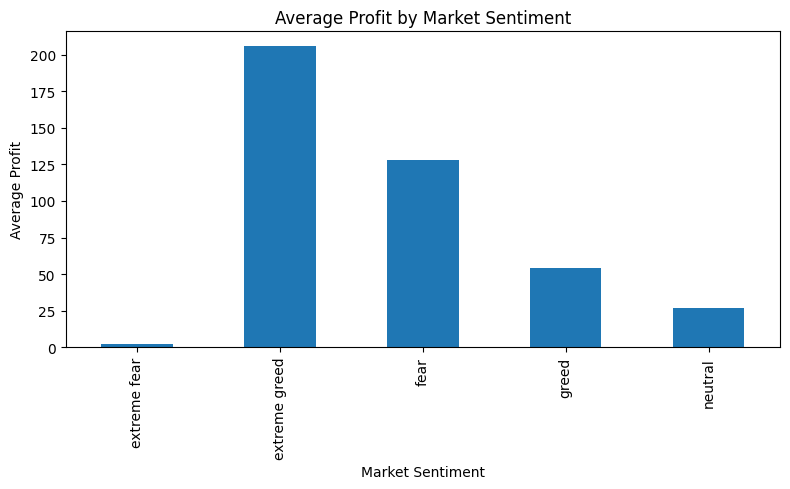

In [25]:
import matplotlib.pyplot as plt

profit_plot = merged.groupby('classification')['profit'].mean()

plt.figure(figsize=(8,5))
profit_plot.plot(kind='bar')
plt.title("Average Profit by Market Sentiment")
plt.ylabel("Average Profit")
plt.xlabel("Market Sentiment")
plt.tight_layout()
plt.savefig("/content/ds_prathmesh_shinde/outputs/profit_by_sentiment.png")
plt.show()


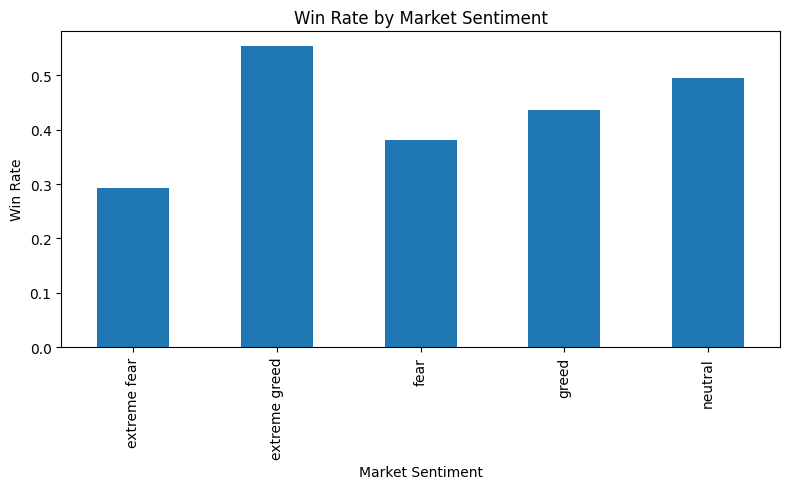

In [26]:
win_plot = merged.groupby('classification')['win'].mean()

plt.figure(figsize=(8,5))
win_plot.plot(kind='bar')
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Rate")
plt.xlabel("Market Sentiment")
plt.tight_layout()
plt.savefig("/content/ds_prathmesh_shinde/outputs/winrate_by_sentiment.png")
plt.show()


In [27]:
top_traders = merged.groupby(['Account','classification'])['profit'].sum().reset_index()

top_fear = top_traders[top_traders['classification']=='fear'].sort_values('profit', ascending=False).head(5)
top_greed = top_traders[top_traders['classification']=='greed'].sort_values('profit', ascending=False).head(5)

top_fear, top_greed


(                                        Account classification        profit
 1    0x083384f897ee0f19899168e3b1bec365f52a9012           fear  1.010607e+06
 59   0x72c6a4624e1dffa724e6d00d64ceae698af892a0           fear  1.972949e+05
 107  0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3           fear  1.711983e+05
 97   0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23           fear  1.481471e+05
 45   0x4f93fead39b70a1824f981a54d4e55b278e9f760           fear  6.893832e+04,
                                         Account classification         profit
 98   0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23          greed  332705.773842
 104  0xbaaaf6571ab7d571043ff1e313a9609a10637864          greed  188116.840712
 64   0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4          greed   68045.186468
 51   0x513b8629fe877bb581bf244e326a047b249c4ff1          greed   60544.304874
 87   0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0          greed   34709.852428)

In [28]:
merged.to_csv("/content/ds_prathmesh_shinde/csv_files/processed_data.csv", index=False)


In [31]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [32]:
!zip -r ds_prathmesh_shinde.zip /content/ds_prathmesh_shinde


  adding: content/ds_prathmesh_shinde/ (stored 0%)
  adding: content/ds_prathmesh_shinde/csv_files/ (stored 0%)
  adding: content/ds_prathmesh_shinde/csv_files/trader_data.csv (deflated 80%)
  adding: content/ds_prathmesh_shinde/csv_files/processed_data.csv (deflated 81%)
  adding: content/ds_prathmesh_shinde/csv_files/fear_greed.csv (deflated 77%)
  adding: content/ds_prathmesh_shinde/outputs/ (stored 0%)
  adding: content/ds_prathmesh_shinde/outputs/winrate_by_sentiment.png (deflated 19%)
  adding: content/ds_prathmesh_shinde/outputs/profit_by_sentiment.png (deflated 18%)
  adding: content/ds_prathmesh_shinde/ds_report.pdf (deflated 7%)
